In [22]:
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import pandas as pd
import netCDF4
%matplotlib inline

In [24]:
areacella1 = xr.open_dataset('areacella_fx_CanESM5_historical_r10i1p1f1_gn.nc').areacella
areacella2 = xr.open_dataset('areacella_fx_CanESM5-CanOE_historical_r1i1p2f1_gn.nc').areacella
areacella3 = xr.open_dataset('areacella_fx_UKESM1-0-LL_piControl_r1i1p1f2_native.nc').areacella
areacella4 = xr.open_dataset('areacella_fx_CNRM-ESM2-1_historical_r10i1p1f2_gr.nc').areacella
areacella5 = xr.open_dataset('areacella_fx_IPSL-CM6A-LR_historical_r1i1p1f1_gr.nc').areacella
areacella6 = xr.open_dataset('areacella_fx_ACCESS-ESM1-5_historical_r1i1p1f1_gn.nc').areacella
areacella7 = xr.open_dataset('areacella_fx_MPI-ESM1-2-LR_historical_r1i1p1f1_gn.nc').areacella
areacella8 = xr.open_dataset('areacella_fx_MIROC-ES2L_historical_r10i1p1f2_gn.nc').areacella
areacella9 = xr.open_dataset('areacella_fx_INM-CM5-0_historical_r1i1p1f1_gr1.nc').areacella
areacella10 = xr.open_dataset('areacella_fx_INM-CM4-8_historical_r1i1p1f1_gr1.nc').areacella

In [25]:
landfrac1 = xr.open_dataset('sftlf_fx_CanESM5_ssp585_r1i1p1f1_gn.nc').sftlf
landfrac2 = xr.open_dataset('sftlf_fx_CanESM5-CanOE_historical_r1i1p2f1_gn.nc').sftlf
landfrac3 = xr.open_dataset('sftlf_fx_UKESM1-0-LL_piControl_r1i1p1f2_native.nc').sftlf
landfrac4 = xr.open_dataset('sftlf_fx_CNRM-ESM2-1_historical_r10i1p1f2_gr.nc').sftlf
landfrac5 = xr.open_dataset('sftlf_fx_IPSL-CM6A-LR_historical_r1i1p1f1_gr.nc').sftlf
landfrac6 = xr.open_dataset('sftlf_fx_ACCESS-ESM1-5_historical_r10i1p1f1_gn.nc').sftlf
landfrac7 = xr.open_dataset('sftlf_fx_MPI-ESM1-2-LR_historical_r1i1p1f1_gn.nc').sftlf
landfrac8 = xr.open_dataset('sftlf_fx_MIROC-ES2L_historical_r1i1p1f2_gn.nc').sftlf
landfrac9 = xr.open_dataset('sftlf_fx_INM-CM5-0_historical_r1i1p1f1_gr1.nc').sftlf
landfrac10 = xr.open_dataset('sftlf_fx_INM-CM4-8_historical_r1i1p1f1_gr1.nc').sftlf

In [26]:
area1 = areacella1 * landfrac1/100
area2 = areacella2 * landfrac2/100
area3 = areacella3 * landfrac3/100
area4 = areacella4 * landfrac4/100
area5 = areacella5 * landfrac5/100
area6 = areacella6 * landfrac6/100
area7 = areacella7 * landfrac7/100
area8 = areacella8 * landfrac8/100
area9 = areacella9 * landfrac9/100
area10 = areacella10 * landfrac10/100

In [27]:
ds1 = xr.open_dataset('gpp_Lmon_CanESM5_hist_ssp245_r10i1p1f1_gn_185001-210012.nc')
ds2 = xr.open_dataset('gpp_Lmon_CanESM5-CanOE_hist_ssp245_r1i1p2f1_gn_185001-210012.nc')
ds3 = xr.open_dataset('gpp_Lmon_UKESM1-0-LL_hist_ssp245_r1i1p1f2_gn_185001-210012.nc')
ds4 = xr.open_dataset('gpp_Lmon_CNRM-ESM2-1_hist_ssp245_r1i1p1f2_gr_185001-210012.nc')
ds5 = xr.open_dataset('gpp_Lmon_IPSL-CM6A-LR_hist_ssp245_r1i1p1f1_gr_185001-210012.nc')
ds6 = xr.open_dataset('gpp_Lmon_ACCESS-ESM1-5_hist_ssp245_r1i1p1f1_gn_185001-210012.nc')
ds7 = xr.open_dataset('gpp_Lmon_MPI-ESM1-2-LR_hist_ssp245_r1i1p1f1_gn_185001-210012.nc')
ds8 = xr.open_dataset('gpp_Lmon_MIROC-ES2L_hist_ssp245_r10i1p1f2_gn_185001-210012.nc')
ds9 = xr.open_dataset('gpp_Lmon_INM-CM5-0_hist_ssp245_r1i1p1f1_gr1_185001-210012.nc')
ds10 = xr.open_dataset('gpp_Lmon_INM-CM4-8_hist_ssp245_r1i1p1f1_gr1_185001-210012.nc')

In [28]:
dset_dict = {'CanESM5':ds1, 'CanESM5-CanOE':ds2, 'UKESM1-0-LL':ds3,  
             'CNRM-ESM2-1':ds4, 'IPSL-CM6A-LR':ds5, 'ACCESS-ESM1-5':ds6,
             'MPI-ESM1-2-LR':ds7, 'MIROC-ES2L':ds8,
             'INM-CM5-0':ds9, 'INM-CM4-8':ds10}

In [29]:
time_slice=slice('1850', '2100')

In [30]:
#initialize dictionary of xarray datasets
gpp_dict = {}

for name, ds in dset_dict.items():
        
    ds = xr.decode_cf(ds)
    ds = ds.sel(time=time_slice)
    
    # convert from per second to per year
    yearsec = 365*24*60*60
    ds.gpp.data = ds.gpp.data * yearsec
    
    #convert from kg to GtC
    ds.gpp.data = ds.gpp.data/(1e12)
    ds.gpp.attrs['units'] = 'GtC m-2 y-1'
    
    #nbp_mon=nbp_mon.sel(lon=slice(lon1,lon2), lat=slice(lat1,lat2))
    
    # drop redundant variables (like "height: 2m")
    for coord in ds.coords:
        if coord not in ['lat', 'lon', 'time']:
            ds = ds.drop(coord)

    gpp_dict[name] = ds

In [31]:
glob1 = gpp_dict['CanESM5'].gpp.weighted(area1).sum(('lon','lat'))
glob2 = gpp_dict['CanESM5-CanOE'].gpp.weighted(area2).sum(('lon','lat'))
glob3 = gpp_dict['UKESM1-0-LL'].gpp.weighted(area3).sum(('lon','lat'))
glob4 = gpp_dict['CNRM-ESM2-1'].gpp.weighted(area4).sum(('lon','lat'))
glob5 = gpp_dict['IPSL-CM6A-LR'].gpp.weighted(area5).sum(('lon','lat'))
glob6 = gpp_dict['ACCESS-ESM1-5'].gpp.weighted(area6).sum(('lon','lat'))
glob7 = gpp_dict['MPI-ESM1-2-LR'].gpp.weighted(area7).sum(('lon','lat'))
glob8 = gpp_dict['MIROC-ES2L'].gpp.weighted(area8).sum(('lon','lat'))
glob9 = gpp_dict['INM-CM5-0'].gpp.weighted(area9).sum(('lon','lat'))
glob10 = gpp_dict['INM-CM4-8'].gpp.weighted(area10).sum(('lon','lat'))

In [32]:
ggpp_dict = {'CanESM5':glob1, 'CanESM5-CanOE':glob2, 'UKESM1-0-LL':glob3, 
             'CNRM-ESM2-1':glob4, 'IPSL-CM6A-LR':glob5,'ACCESS-ESM1-5':glob6,
             'MPI-ESM1-2-LR':glob7, 'MIROC-ES2L':glob8,
             'INM-CM5-0':glob9, 'INM-CM4-8':glob10}

## Plotting Time Series: Changes in global mean nbp (1850-2100 wrt 1850-1900)

In [34]:
for name, ggpp in ggpp_dict.items():
    
    # drop redundant variables (like "type")
    for coord in ggpp.coords:
        if coord not in ['time']:
            ggpp = ggpp.drop(coord)
    
    # reference the GSAT relative to the 1850 to 1900 pre-industrial period
    ggpp_anomalies = ggpp - ggpp.sel(time=slice('1850','1900')).mean(dim='time')
    
    ggpp_ann_anomalies = ggpp_anomalies.groupby('time.year').mean('time')
        
    # renaming labels
    ggpp_ann_anomalies = ggpp_ann_anomalies.rename(
        r'Global-mean GPP relative to 1850-1900 in GtC/yr'
    )
    
    ggpp_dict[name] = ggpp_ann_anomalies.compute()

In [35]:
ggpp_ann_anomalies.dims, ggpp_ann_anomalies.shape, ggpp_ann_anomalies.coords

(('year',),
 (251,),
 Coordinates:
   * year     (year) int64 1850 1851 1852 1853 1854 ... 2096 2097 2098 2099 2100)

In [36]:
ggpp1_roll = ggpp_dict['CanESM5'].rolling(year=10).mean()
ggpp2_roll = ggpp_dict['CanESM5-CanOE'].rolling(year=10).mean()
ggpp3_roll = ggpp_dict['UKESM1-0-LL'].rolling(year=10).mean()
ggpp4_roll = ggpp_dict['CNRM-ESM2-1'].rolling(year=10).mean()
ggpp5_roll = ggpp_dict['IPSL-CM6A-LR'].rolling(year=10).mean()
ggpp6_roll = ggpp_dict['ACCESS-ESM1-5'].rolling(year=10).mean()
ggpp7_roll = ggpp_dict['MPI-ESM1-2-LR'].rolling(year=10).mean()
ggpp8_roll = ggpp_dict['MIROC-ES2L'].rolling(year=10).mean()
ggpp9_roll = ggpp_dict['INM-CM5-0'].rolling(year=10).mean()
ggpp10_roll = ggpp_dict['INM-CM4-8'].rolling(year=10).mean()

modelmean = (ggpp1_roll + ggpp2_roll + ggpp3_roll + ggpp4_roll +ggpp5_roll+ggpp6_roll 
             + ggpp7_roll + ggpp8_roll + ggpp9_roll +ggpp10_roll)/10

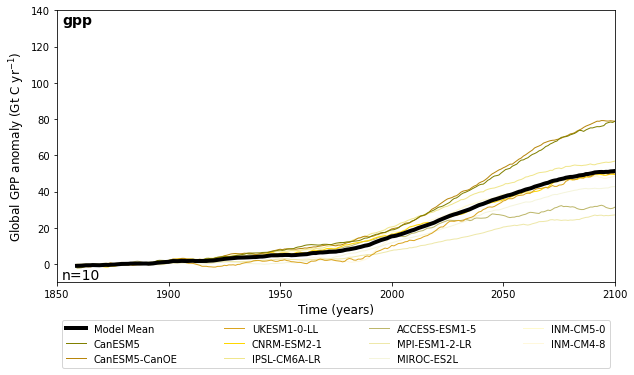

In [54]:
fig,ax = plt.subplots(figsize=(10,5))

ggpp10_roll.plot(linewidth=1, color= 'cornsilk',  label='INM-CM4-8')
ggpp9_roll.plot(linewidth=1, color= 'lemonchiffon', label='INM-CM5-0')
ggpp8_roll.plot(linewidth=1, color= 'beige', label='MIROC-ES2L')
ggpp7_roll.plot(linewidth=1, color= 'palegoldenrod',  label='MPI-ESM1-2-LR')
ggpp6_roll.plot(linewidth=1, color= 'darkkhaki', label='ACCESS-ESM1-5')
ggpp5_roll.plot(linewidth=1, color= 'khaki',  label='IPSL-CM6A-LR')
ggpp4_roll.plot(linewidth=1, color= 'gold', label='CNRM-ESM2-1')
ggpp3_roll.plot(linewidth=1, color= 'goldenrod', label='UKESM1-0-LL')
ggpp2_roll.plot(linewidth=1, color= 'darkgoldenrod', label='CanESM5-CanOE')
ggpp1_roll.plot(linewidth=1, color= 'olive', label='CanESM5')

modelmean.plot(linewidth=4, color= 'black', label= 'Model Mean')

#add right colors
#N = 6
#plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.RdYlGn(np.linspace(0,1,N)))

# set titel and name for axes
# plt.title('SSP2-4.5', fontsize = 14, fontweight = 'bold')
ax.text(0.01, 0.95, 'gpp', 
        transform=ax.transAxes, ha="left", fontsize= 14, fontweight = 'bold')
ax.text(0.009, 0.01, 'n=10', 
        transform=ax.transAxes, ha="left", fontsize= 14)
plt.xlabel('Time (years)', fontsize = 12)
plt.ylabel(r'Global GPP anomaly (Gt C yr$^{\minus1}$)', fontsize = 12)
plt.xlim([1850,2100])
plt.ylim([-10,140])

# plotting legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1],bbox_to_anchor=(0, -0.12, 1, 0), loc="upper left", mode="expand", ncol=4)

plt.savefig("TimeSeriesMultiModelCarbonChanges245.png", bbox_inches="tight")
plt.show();

In [42]:
max_gpp = max(modelmean)  # Find the maximum y value
max_year = modelmean[modelmean.argmax()]  # Find the x value corresponding to the maximum y value
print (max_year, max_gpp)

<xarray.DataArray 'Global-mean GPP relative to 1850-1900 in GtC/yr' ()>
array(51.36374838)
Coordinates:
    year     int64 2100 <xarray.DataArray 'Global-mean GPP relative to 1850-1900 in GtC/yr' ()>
array(nan)
Coordinates:
    year     int64 1850


In [43]:
modelmean.sel(year=slice('2025','2035'))

<xarray.DataArray 'Global-mean GPP relative to 1850-1900 in GtC/yr' (year: 11)>
array([26.08843738, 26.6000605 , 27.00418494, 27.40849182, 27.73617898,
       28.15766391, 28.60087348, 28.98995124, 29.42412233, 29.83005503,
       30.25938944])
Coordinates:
  * year     (year) int64 2025 2026 2027 2028 2029 2030 2031 2032 2033 2034 2035

In [44]:
modelmean.sel(year=slice('2025','2035')).mean()

<xarray.DataArray 'Global-mean GPP relative to 1850-1900 in GtC/yr' ()>
array(28.19085537)

In [45]:
modelmean.sel(year=slice('2042','2052'))

<xarray.DataArray 'Global-mean GPP relative to 1850-1900 in GtC/yr' (year: 11)>
array([33.74077624, 34.29028157, 34.78421478, 35.21590689, 35.55332779,
       35.93317502, 36.33104613, 36.70674521, 37.17211725, 37.53225295,
       37.88504819])
Coordinates:
  * year     (year) int64 2042 2043 2044 2045 2046 2047 2048 2049 2050 2051 2052

In [46]:
modelmean.sel(year=slice('2042','2052')).mean()

<xarray.DataArray 'Global-mean GPP relative to 1850-1900 in GtC/yr' ()>
array(35.92226291)

In [47]:
modelmean.sel(year=slice('2090','2100'))

<xarray.DataArray 'Global-mean GPP relative to 1850-1900 in GtC/yr' (year: 11)>
array([50.20649901, 50.58120109, 50.72071901, 50.80272004, 50.83297997,
       50.770538  , 50.89918379, 50.87143671, 51.14406754, 51.22095759,
       51.36374838])
Coordinates:
  * year     (year) int64 2090 2091 2092 2093 2094 2095 2096 2097 2098 2099 2100

In [48]:
modelmean.sel(year=slice('2090','2100')).mean()

<xarray.DataArray 'Global-mean GPP relative to 1850-1900 in GtC/yr' ()>
array(50.85582283)

In [49]:
modelmean.sel(year=slice('2067','2077'))

<xarray.DataArray 'Global-mean GPP relative to 1850-1900 in GtC/yr' (year: 11)>
array([43.76241769, 44.22347272, 44.59132797, 44.85561145, 45.3779697 ,
       45.82784978, 46.11285973, 46.28490258, 46.72568113, 46.9537455 ,
       47.22488819])
Coordinates:
  * year     (year) int64 2067 2068 2069 2070 2071 2072 2073 2074 2075 2076 2077

In [50]:
modelmean.sel(year=slice('2067','2077')).mean()

<xarray.DataArray 'Global-mean GPP relative to 1850-1900 in GtC/yr' ()>
array(45.63097513)